# Practical coding assignment 1#

## Assignment consitsts of 2 Sections:##


###  1. Part I,III, IV this is a simple introduction to numpy. However, it has an integrated theoretical exercise inside, don't miss it!

###  2. Fun with ~~flags~~ data generating models. This section also has a simple theoretical exercise inside.


## Section 1

##### THIS GUIDE IS ADAPTED FROM THE ASSIGNMENT 1 GUIDE OF RL-LEARNING COURSE BY HSE (Higher School Of Economics)

### Part I: Jupyter notebooks in a nutshell
* You are reading this line in a jupyter notebook.
* A notebook consists of cells. A cell can contain either code or hypertext. 
    * This cell contains hypertext. The next cell contains code.
* You can __run a cell__ with code by selecting it (click) and pressing `Ctrl + Enter` to execute the code and display output(if any).
* If you're running this on a device with no keyboard, ~~you are doing it wrong~~ use topbar (esp. play/stop/restart buttons) to run code.
* Behind the curtains, there's a python interpreter that runs that code and remembers anything you defined.

Run these cells to get started

In [1]:
a = 5

In [2]:
print(a * 2)

10


* `Ctrl + S` to save changes (or use the button that looks like a floppy disk)
* Top menu -> Kernel -> Interrupt (or Stop button) if you want it to stop running cell midway.
* Top menu -> Kernel -> Restart (or cyclic arrow button) if interrupt doesn't fix the problem (you will lose all variables).
* For shortcut junkies like us: Top menu -> Help -> Keyboard Shortcuts


* More: [Hacker's guide](http://arogozhnikov.github.io/2016/09/10/jupyter-features.html), [Beginner's guide'](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/), [Datacamp tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)

Now __the most important feature__ of jupyter notebooks for this course: 
* if you're typing something, press `Tab` to see automatic suggestions, use arrow keys + enter to pick one.
* if you move your cursor inside some function and press `__Shift + Tab__`, you'll get a help window. `Shift + (Tab , Tab)` will expand it.

In [3]:
# run this first
import math

In [4]:
# place your cursor at the end of the unfinished line below to find a function 
# that computes arctangent from two parameters (should have 2 in it's name)
# once you chose it, press shift + tab + tab(again) to see the docs

math.atan(a)

1.373400766945016

### Part III: Numpy and vectorized computing

Almost any statistical model requires some computational heavy lifting usually involving linear algebra problems. Unfortunately, raw python is terrible at this because each operation is interpreted at runtime. 

So instead, we'll use `numpy` - a library that lets you run blazing fast computation with vectors, matrices and other tensors. Again, the god object here is `numpy.ndarray`:

In [5]:
import numpy as np

a = np.array([1,2,3,4,5])
b = np.array([5,4,3,2,1])
print("a = ",a)
print("b = ",b)

# math and boolean operations can applied to each element of an array
print("a + 1 =", a + 1)
print("a * 2 =", a * 2)
print("a == 2", a == 2)
# ... or corresponding elements of two (or more) arrays
print("a + b =",a + b)
print("a * b =",a * b)

a =  [1 2 3 4 5]
b =  [5 4 3 2 1]
a + 1 = [2 3 4 5 6]
a * 2 = [ 2  4  6  8 10]
a == 2 [False  True False False False]
a + b = [6 6 6 6 6]
a * b = [5 8 9 8 5]


In [6]:
# Your turn: compute half-products of a and b elements (halves of products)
print(a * b / 2)

#my question: or this means this:
print(np.prod(a) / 2, np.prod(b) / 2)

array([2.5, 4. , 4.5, 4. , 2.5])

In [7]:
# compute elementwise quoient between squared a and (b plus 1)
np.sqrt(a) / (b + 1)

array([0.16666667, 0.28284271, 0.4330127 , 0.66666667, 1.11803399])

```

```

```

```

```

```

```

```

```

```


### How fast is it, harry?
![img](https://img.buzzfeed.com/buzzfeed-static/static/2015-11/6/7/enhanced/webdr10/enhanced-buzz-22847-1446811476-0.jpg)

Let's compare computation time for python and numpy
* Two arrays of 10^6 elements
 * first - from 0 to 1 000 000
 * second - from 99 to 1 000 099
 
* Computing:
 * elemwise sum
 * elemwise product
 * square root of first array
 * sum of all elements in the first array
 

In [8]:
%%time 
# ^-- this "magic" measures and prints cell computation time

# Option I: pure python
arr_1 = range(1000000)
arr_2 = range(99,1000099)


a_sum = []
a_prod = []
sqrt_a1 = []
for i in range(len(arr_1)):
    a_sum.append(arr_1[i]+arr_2[i])
    a_prod.append(arr_1[i]*arr_2[i])
    a_sum.append(arr_1[i]**0.5)
    
arr_1_sum = sum(arr_1)


Wall time: 1.03 s


In [9]:
%%time

# Option II: start from python, convert to numpy
arr_1 = range(1000000)
arr_2 = range(99,1000099)

arr_1, arr_2 = np.array(arr_1) , np.array(arr_2)


a_sum = arr_1 + arr_2
a_prod = arr_1 * arr_2
sqrt_a1 = arr_1 ** .5
arr_1_sum = arr_1.sum()


Wall time: 386 ms


In [10]:
%%time

# Option III: pure numpy
arr_1 = np.arange(1000000)
arr_2 = np.arange(99,1000099)

a_sum = arr_1 + arr_2
a_prod = arr_1 * arr_2
sqrt_a1 = arr_1 ** .5
arr_1_sum = arr_1.sum()


Wall time: 42.9 ms




There's also a bunch of pre-implemented operations including logarithms, trigonometry, vector/matrix products and aggregations.

In [11]:
a = np.array([1,2,3,4,5])
b = np.array([5,4,3,2,1])
print("numpy.sum(a) = ", np.sum(a))
print("numpy.mean(a) = ", np.mean(a))
print("numpy.min(a) = ",  np.min(a))
print("numpy.argmin(b) = ", np.argmin(b))  # index of minimal element
print("numpy.dot(a,b) = ", np.dot(a, b))      # dot product. Also used for matrix/tensor multiplication
print("numpy.unique(['male','male','female','female','male']) = ", np.unique(['male','male','female','female','male']))

# and tons of other stuff. see http://bit.ly/2u5q430 .

numpy.sum(a) =  15
numpy.mean(a) =  3.0
numpy.min(a) =  1
numpy.argmin(b) =  4
numpy.dot(a,b) =  35
numpy.unique(['male','male','female','female','male']) =  ['female' 'male']


The important part: all this functionality works with Pandas dataframes!

The final numpy feature we'll need is indexing: selecting elements from an array. 
Aside from python indexes and slices (e.g. a[1:4]), numpy also allows you to select several elements at once.

In [12]:
a = np.array([0, 1, 4, 9, 16, 25])
ix = np.array([1,2,3])
print("a = ", a)
print("Select by element index")
print("a[[1,2,5]] = ", a[ix])

print("\nSelect by boolean mask")
print("a[a > 5] = ", a[a > 5])     # select all elementts in a that are greater than 5
print("(a % 2 == 0) =",a % 2 == 0) # True for even, False for odd
print("a[a > 3] =", a[a % 2 == 0]) # select all elements in a that are even




a =  [ 0  1  4  9 16 25]
Select by element index
a[[1,2,5]] =  [1 4 9]

Select by boolean mask
a[a > 5] =  [ 9 16 25]
(a % 2 == 0) = [ True False  True False  True False]
a[a > 3] = [ 0  4 16]


 ## Matrix operations

In [13]:
A = np.array([[1,2],[3,4]]) # just a square matrix
print("just a square matrix A =")
print(A)

print("elementwise product of its elements",)
B =  A**2  # elementwise product of its elements
print( B)

print("again, elementwise product of its elements") # elementwise product of its elements
B1 =  A*A  # elementwise product of its elements
print( B1)


print("standard matrix product" )

C = np.dot(A,A)
print( C)


just a square matrix A =
[[1 2]
 [3 4]]
elementwise product of its elements
[[ 1  4]
 [ 9 16]]
again, elementwise product of its elements
[[ 1  4]
 [ 9 16]]
standard matrix product
[[ 7 10]
 [15 22]]


### EXERCISE 1, Your turn! (also see problem 7)

Use numpy to answer a few questions

In [14]:
# the following command generates a random square matrix

X = np.random.rand(3,2)


You need to 
* 1) check its shape ("X.shape" command)  
* 2) calculate matrix C = X'*X, where ' is for transpose. 
* 3) which shape does it have? 
* 4) find a list of eigenvalues (call it $\lambda_1$,  $\lambda_2$) and eigenvectors (call it v1, v2) of C (Google youself, how to do that!, Hint: np.linalg..... )
* 5) Show that a standard eigendecomposition C = V L V' holds, where  L = diag_matrix( $\lambda_1$,  $\lambda_2$) is a diagonal matrix (see np.diag command), and V is a change of basis matrix, see
https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B5%D0%BA%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D1%8B

what sign (positive or negative do eigenvalues have?)
* 6) Solve corresponding exercise from Problem_set3_HW_updated

In [15]:
# You need to fill in the gaps

#1. Shape 
shapeX = X.shape
print("shape = ", shapeX)

#2. Matrix C
C = np.dot(X.transpose(),X)

# 3. 
shapeC = C.shape
print("shape = ", shapeC)


#4. 
lmb, V = np.linalg.eig(C)

#5.

L = np.diag(lmb)

C1 = np.dot(np.dot(V, L),V.transpose())

# check more elegant approach multi_dot([A, B, C, D]):

C2 = np.linalg.multi_dot([V, L, V.T])

# check that everything worked correctly

print("||C1-C||=", np.linalg.norm(C1-C)) # this should be close to zero, not 0 due to numerical errors.
print("||C2-C||=", np.linalg.norm(C2-C)) #


shape =  (3, 2)
shape =  (2, 2)
||C1-C||= 6.280369834735101e-16
||C2-C||= 6.280369834735101e-16


## Creating your own functions. 

Some functions are realized in libraries, like numpy and math, you've  already used them

In [16]:
x=2
print("using numpy sin(x)=", np.sin(x))# just sin(x)

print("using math sin(x)=" , math.sin(x))# also sin(x)

np.sin(x) - math.sin(x) # look they are equal (actually usually realizations by different libs may slightly differ)


using numpy sin(x)= 0.9092974268256817
using math sin(x)= 0.9092974268256817


0.0

Also you can create your own functions. For instance, here is a new function that calculates sin(2x)

In [17]:
def sin2(x):
    y = np.sin(2*x)
    return y

In [18]:
# now you can call it like this

sin2(1)

0.9092974268256817

In [19]:
machine_zero = np.finfo(float).eps
# write your own function, that calculates difference d = |np.sin(2*x) - 2*np.sin(x)*np.cos(x)| and
# returns true if d is numerical zero , i.e. d < machine_zero
x=1
#
# Your code here
#
def func(x):
    return np.abs(sin2(x) - 2*np.sin(x)*np.cos(x)) < machine_zero

func(1)

True

# Part IV: plots and matplotlib

Using python to visualize the data is covered by yet another library: `matplotlib`.

Just like python itself, matplotlib has an awesome tendency of keeping simple things simple while still allowing you to write complicated stuff with convenience (e.g. super-detailed plots or custom animations).

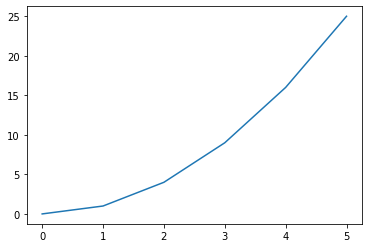

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline  
# ^-- this "magic" tells all future matplotlib plots to be drawn inside notebook and not in a separate window.

# line plot
plt.plot([0,1,2,3,4,5],[0,1,4,9,16,25]);

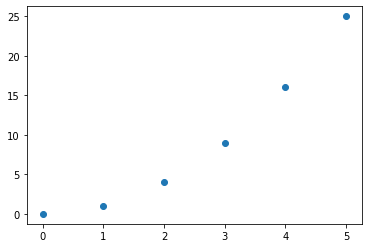

In [21]:
#scatter-plot
plt.scatter([0,1,2,3,4,5],[0,1,4,9,16,25])

plt.show()  # show the first plot and begin drawing next one

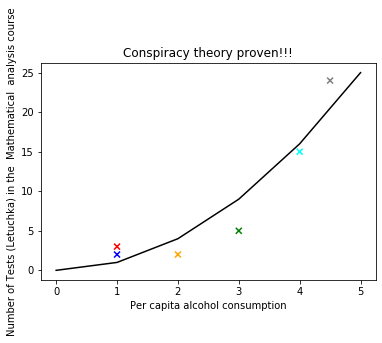

In [22]:
# draw a scatter plot with custom markers and colors
plt.scatter([1,1,2,3,4,4.5],[3,2,2,5,15,24],
            c = ["red","blue","orange","green","cyan","gray"], marker = "x")

# without .show(), several plots will be drawn on top of one another
plt.plot([0,1,2,3,4,5],[0,1,4,9,16,25],c = "black")

# adding more sugar
plt.title("Conspiracy theory proven!!!")
plt.xlabel("Per capita alcohol consumption")
plt.ylabel("Number of Tests (Letuchka) in the  Mathematical  analysis course");



### Some more  funny correlations: http://bit.ly/1FcNnWF, don't miss them :)

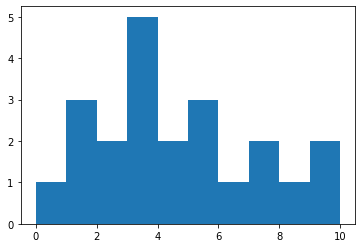

In [23]:
# histogram - showing data empirical density
plt.hist([0,1,1,1,2,2,3,3,3,3,3,4,4,5,5,5,6,7,7,8,9,10])
plt.show()



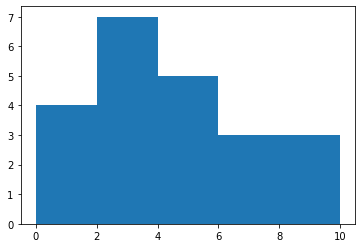

In [24]:
#  same with less bins

plt.hist([0,1,1,1,2,2,3,3,3,3,3,4,4,5,5,5,6,7,7,8,9,10], bins = 5);

# Section 2

### In this section we consider data generating models. From very simple generating of random variables to linear models, nonlinear models and beyond. 

### Random variables
#### The best way to "feel" random objects is to look at lots of samples. Let $N$ denote a sample size. 

1. Bernoulli distribution (or a simple coin toss) 







In [25]:
one_toss = np.random.binomial(1, 1/3, [1])

print("result of a toss is", one_toss[0])


result of a toss is 0


Note it is random, once you rerun the cell above `Shift+Enter`,  you may see a different value!

In [27]:
N = 20
# let's have a look at the sample

smpl = [ np.random.binomial(1, 1/3, [1]) for i in range(N)]

# convert it to more comfortable np-array
smpl = np.array(smpl)


print("sample shape = ", smpl.shape) # oh, its a (20 x 1) matrix!

print("sample is", smpl[:,0]) #  array with 20 entries

print("average number (or realized mean value) is ", np.mean(smpl[:,0])) #  array with 20 entries

# plt.hist(smpl, bins = 2)
# plt.show()

# thereis a more clever way to do this!!!! 
# just use smpl = np.random.binomial(1, 1/3, [N])

sample shape =  (20, 1)
sample is [0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1]
average number (or realized mean value) is  0.35


Print "heads tails" in Google to have a look at animation.

## EXERCISE 2, Your turn!


Generate  2. Poisson, 3. Standard Cauchy and 4. Standard Normal and 5. Normal distributed (mu = M, Std = D) samples, 
(Let M be your grade for Mathematical analysis course and D = sqrt(n), where n is the class size). Where do these distributions commonly arise?


* A. Plot sample itself (as a set of points in $\mathbb{R}$)

* B. Plot their histograms. 

* C. Extraexercise: plot their sample distribution function.

Note, once again, both histogram and sample distribution functions are random. It is interesting, what happens, when you increase $N$.  Task 2 and 5 are already done for you. Use them as a starting point.

In [28]:
N = 1000 #sample size

 2. Poisson: commanly models  processes with a fixed intensity "$\lambda$" like a number of incoming phone calls at the phone station per hour.  It takes discrete values  x=0,1,2.. with probs $P(x=k) = \frac{exp(-\lambda)\lambda^k}{k!}$ .


In [247]:
from scipy.special import gamma

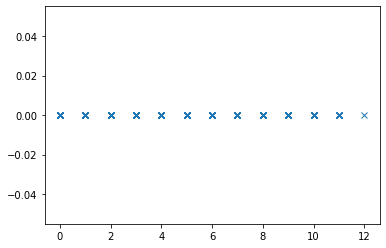

first 10 realized values  [3 1 2 1 3 2 0 1 5 2]


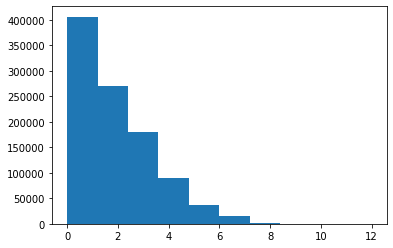

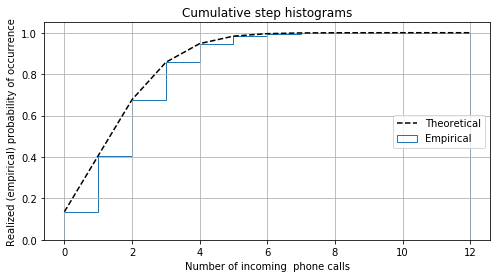

In [257]:
# Generating sample
lam = 2
smpl = np.random.poisson(lam = lam, size = N ) #  For instance, it each number can model an incoming tcpip connections received by some distant server 
# A. 
plt.plot(smpl, np.zeros_like(smpl), 'x') # its just one-dimensional plot, note, more common values will look more shady.
plt.show()

# have a look at smpl:
print('first 10 realized values ',smpl[0:10])
# B. 
plt.hist(smpl, bins = 10) # bins is a number of "boxes" (disjoint intervals of equal "width" covering set of observations) we put observations in. Height of columns = number of observations in a box.
plt.show()
#C. 
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n_bins = smpl.max() # technical parameter
n, bins, patches = ax.hist(smpl, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the theoretical distribution F.
y = np.exp(-lam) * lam ** bins / np.vectorize(math.factorial)(bins)
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Number of incoming  phone calls')
ax.set_ylabel('Realized (empirical) probability of occurrence')

plt.show()


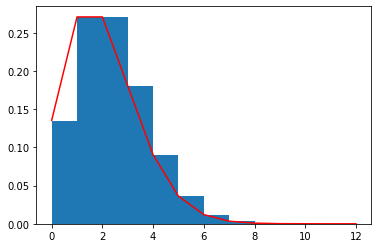

In [269]:
###############################

# D. instead of cumulative distribution one can depict density function. 
# It is especially inetersting to look at one picture with normalized histogram

points = np.array(range(smpl.max() + 1))
points.sort()
pdf = np.exp(-lam) * lam ** points / np.vectorize(math.factorial)(points)
plt.hist(smpl, smpl.max(), density=True);
plt.plot(points, pdf, color='r')
plt.show()

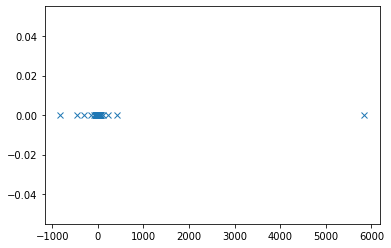

first 10 realized values  [ 0.14959451  5.59622209  5.3567223  -1.30600185  8.72670886  9.21148523
  2.79241446 -1.27659517 -4.45254286  1.04240555]


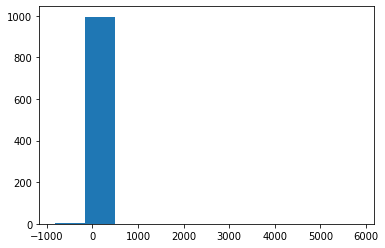

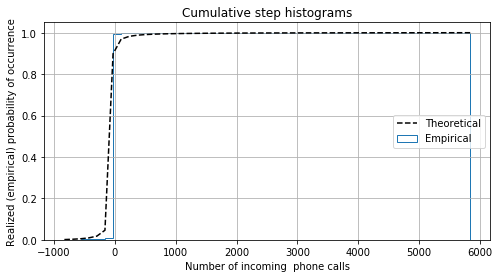

In [129]:
# 3. Standard Cauchy
# TODO
smpl = np.random.standard_cauchy(size=N) #  For instance, it each number can model an incoming tcpip connections received by some distant server 
# A. 
plt.plot(smpl, np.zeros_like(smpl), 'x') # its just one-dimensional plot, note, more common values will look more shady.
plt.show()

# have a look at smpl:
print('first 10 realized values ',smpl[0:10])
# B. 
plt.hist(smpl, bins = 10) # bins is a number of "boxes" (disjoint intervals of equal "width" covering set of observations) we put observations in. Height of columns = number of observations in a box.
plt.show()
#C. 
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n_bins = 50 # technical parameter
n, bins, patches = ax.hist(smpl, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')


# Add a line showing the theoretical distribution F.
y = 1 / (np.pi * (1 + np.square(bins)))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Number of incoming  phone calls')
ax.set_ylabel('Realized (empirical) probability of occurrence')

plt.show()


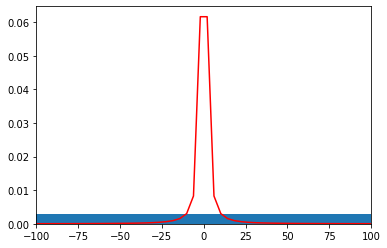

In [131]:
###############################

# D. instead of cumulative distribution one can depict density function. 
# It is especially inetersting to look at one picture with normalized histogram

points = np.linspace(-100,100,50)
pdf = 1 / (np.pi * (1 + np.square(points)))
plt.hist(smpl, 20, density=True);
plt.plot(points, pdf, color='r')
plt.xlim((-100, 100))
plt.show()

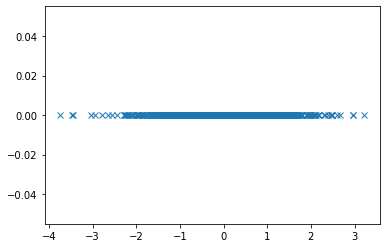

first 10 realized values  [-0.88500809 -0.83404309  0.73532034  1.5995019   1.91622905 -0.41405621
  1.27929244  0.66652665  0.58605082 -2.24483953]


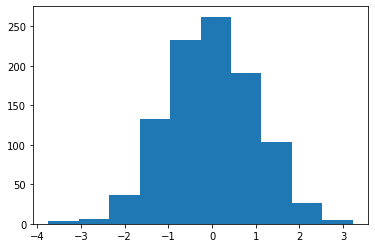

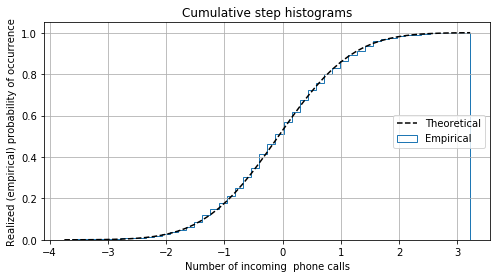

In [56]:
# 4. Standard Normal distribution
# TODO
smpl = np.random.standard_normal(size=N) #  For instance, it each number can model an incoming tcpip connections received by some distant server 
# A. 
plt.plot(smpl, np.zeros_like(smpl), 'x') # its just one-dimensional plot, note, more common values will look more shady.
plt.show()

# have a look at smpl:
print('first 10 realized values ',smpl[0:10])
# B. 
plt.hist(smpl, bins = 10) # bins is a number of "boxes" (disjoint intervals of equal "width" covering set of observations) we put observations in. Height of columns = number of observations in a box.
plt.show()
#C. 
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n_bins = 50 # technical parameter
n, bins, patches = ax.hist(smpl, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the theoretical distribution F.
y = ((1 / (np.sqrt(2 * np.pi))) *
     np.exp(-0.5 * np.square(bins)))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Number of incoming  phone calls')
ax.set_ylabel('Realized (empirical) probability of occurrence')

plt.show()

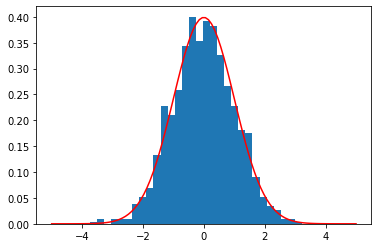

In [59]:
###############################

# D. instead of cumulative distribution one can depict density function. 
# It is especially inetersting to look at one picture with normalized histogram

points = np.linspace(-5,5,100)
pdf = ((1 / (np.sqrt(2 * np.pi))) *
     np.exp(-0.5 * np.square(points)))
plt.hist(smpl, 30, density=True);
plt.plot(points, pdf, color='r')
plt.show()

 4. Normal distribution: commonly arises when a result is obtained as a sum of a big number of different and 
 independent factors.
 It has 2 parameters: mean value $\mu$  and standard deviation $\sigma>0$ (or variance $\sigma^2$).
 Common examples are like Annual rainfall (mm), interestingly, class-grades (before rounding) behave quite similarly. 
 
 It has a density function $$ f(x) = \frac{1}{\sqrt{2 \pi} \sigma)}\exp\big(-\frac{(x - \mu)^2}{ 2 \sigma^2} \big).$$ And a cumulative density function $F(x) = \int\limits_{-\infty}^{x}f(t)dt.$

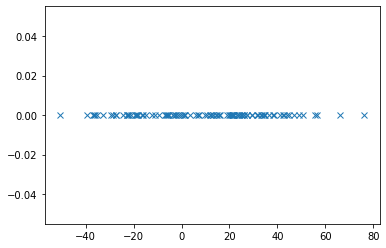

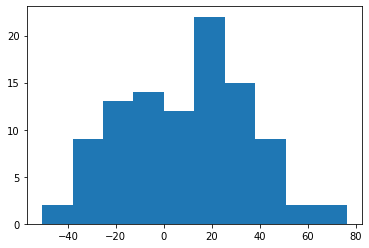

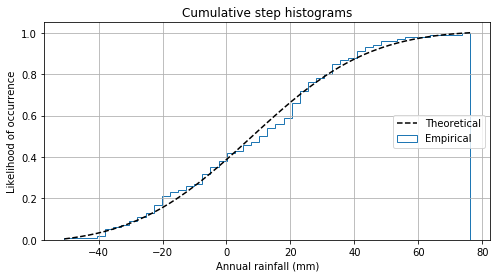

In [132]:
mu = 9
sigma = 29

# Generate sample
smpl = np.random.normal(mu, sigma, size=100)

# A. 
plt.plot(smpl, np.zeros_like(smpl), 'x') # its just one-dimensional plot, note, more common values will look more shady.
plt.show()


# B. 
plt.hist(smpl, bins = 10)
plt.show()


# C.
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(smpl, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the theoretical distribution F.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')


# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()



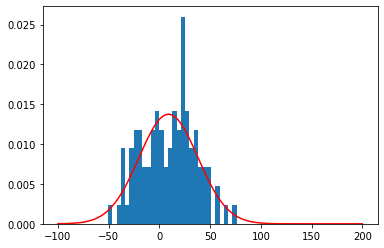

In [133]:
###############################

# D. instead of cumulative distribution one can depict density function. 
# It is especially inetersting to look at one picture with normalized histogram

points = np.linspace(-100,200,100)
pdf = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (points - mu))**2))
plt.hist(smpl, 30, density=True);
plt.plot(points, pdf, color='r')
plt.show()

## EXERCISE 3*, standartization, ~~central~~  local limit theorem

Let's return to Bernoulli model with $p = 1/3$.

Generate n = 30000 different samples consisting of 50000 values each. For each sample calculate its realized (or empirical) mean-value $\bar{X}^{emp}$.
You obtain n numbers.  Let's consider it as a new __random__ sample n -element sample $\{\bar{X}_i\}_{i=1}^{n}$.
 
Check theoretically that  $\mathbb{E}\bar{X} = p$, $\mathbb{Var} \bar{X} = \frac{p(1-p)}{n}.$
Do the following transform: 

$Y_i =  \frac{\bar{X}_i - p}{\sqrt{p(1-p)/n}}, i = 1..n$,

that subtract mean value and devide by std.deviation. 

Set ${Y_i} $ is a new random (however, you deal with realized values) sample. Compare it with standard normal diastribution. Plot density function and normalized histogram as above.



In [143]:
p = 1/3
n = 30000
Y_0 = np.random.binomial(1, p, (n, 50000)).mean(axis=1)

Y_new = (Y_0 - Y_0.mean()) / Y_0.std()
Y_new_1 = (Y_0 - p) / np.sqrt(p * (1-p) / n)

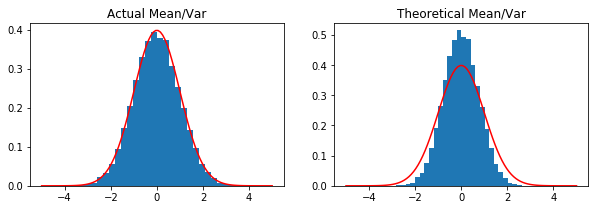

In [165]:
points = np.linspace(-5,5,100)
pdf = ((1 / (np.sqrt(2 * np.pi))) *
     np.exp(-0.5 * np.square(points)))

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.hist(Y_new, 30, density=True);
plt.plot(points, pdf, color='r')
plt.title('Actual Mean/Var')

plt.subplot(1, 2, 2)
plt.hist(Y_new_1, 30, density=True);
plt.plot(points, pdf, color='r')
plt.title('Theoretical Mean/Var')
plt.show()

## EXERCISE 4, it's just a Poisson! , also see Problem 8

Random variable $\xi$ has a Poisson distribution with $\lambda$ parameter equal to 2. 

The new random variable  $X$ is as follows: if $\xi=k$ then you throw a coin with probabilities of head/tails $(1/3,2/3)$ (1/3 is for 1, i.e. head) and sum up number of heads. That is the value of $X$. 
Here you need to generate a <b>100</b> element sample of $X$.

In theoretical exercise, you'll need to show, that it is Poisson (2/3) distributed!

In [230]:
#100 is a small number, I'll take N=100000

def generateOneX(a):
    global p
    return np.random.binomial(1, p, (a)).sum()

p = 1/3
lam = 2
N = 1000000
smpl = np.random.poisson(lam=lam, size=N)

sums = np.vectorize(generateOneX)(smpl)

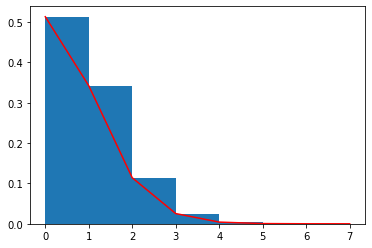

In [236]:
points = np.array(range(8))
pdf = np.exp(-lam * p) * (lam * p) ** points / np.vectorize(math.factorial)(points)
plt.hist(sums, 7, density=True);
plt.plot(points, pdf, color='r')
plt.show()

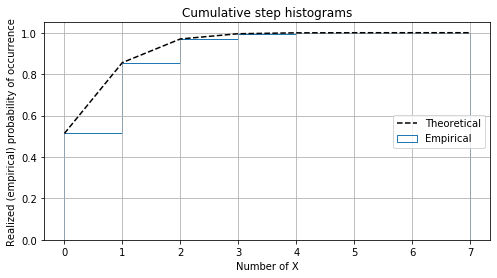

In [235]:
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n_bins = 7 # technical parameter
n, bins, patches = ax.hist(sums, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the theoretical distribution F.
y = np.exp(-lam * p) * (lam * p) ** bins / np.vectorize(math.factorial)(bins)
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Number of X')
ax.set_ylabel('Realized (empirical) probability of occurrence')

plt.show()

## EXERCISE 5, conditional expectations, +see  10 points theoretical exercise!, see problem 9 in theoretical part
A model of a die is given below. It is just a discrete uniformly distributed random variable $X$ with values 1..6.


<img width="200" alt="portfolio_view" src="https://svgsilh.com/svg/308887.svg">

Google "roll a die" to see an animated model :)

In [270]:
X = np.random.randint(1, 6, size = 1)

print("result of rolling a die: ", X )

result of rolling a die:  [5]


Consider 2 more random variables $Y$ and $Z$, that depend on $X$.

1. $Y(X) = X^2$ -- it is just a squared outcome of a die roll.

2. random varibale $Z=Z(X)$, that equals 1, if X is odd,  and equal 0, otherwise. 

Calculate theoretically $\mathbb{E}(Y|Z) = ???$. This should be some function $m(Z)$ of $ Z$.

In class we had a formula for the case when $m(Z) =   \beta_2 Z+ \beta_1 = z'\beta$, where vector $z = (1, Z)$ 
 and $(\beta_1, \beta_2)$ is a numeric vector.

We showed that 

$\beta  = \mathbb{E}(z'z)^{-1}\mathbb{E}(Yz)$ (look at the proof!)

Show theoretically by matrix multiplication that in this case

$\mathbb{E}(Y|Z)  = \beta_1  + \beta_2 Z$ where

$ \beta_1=  \mathbb{E}y- \frac{\mathbb{cov}(Y,Z)}{\mathbb{var}{Z}}\mathbb{E}Z$

$ \beta_2= \frac{\mathbb{cov}(Y,Z)}{\mathbb{var}{Z}}.$


__Very important!__  $\mathbb{cov}$, $\mathbb{var}$ -- are theoretical covariance and theoretical variance; i.e. $\mathbb{cov}(Y,Z)$, $\mathbb{var}Z, \mathbb{E}Z$ are numbers, not random variables! 

Define function m(z) below to look at realization$E(Y|Z)$:

In [286]:
def m(z):
    # calculate theoretically beta1 and beta2
    beta1 = 56/3
    beta2 = -7

    return beta2 * z + beta1


# let's sample some more:
smpl = np.random.randint(1, 6, size = 10)

for x in smpl:

    z = 1 if x%2 == 1 else 0 # in fact it is a coin 
    
    print("realized E(Y|Z) =" ,m(z), "; Z=" ,z)



realized E(Y|Z) = 18.666666666666668 ; Z= 0
realized E(Y|Z) = 18.666666666666668 ; Z= 0
realized E(Y|Z) = 11.666666666666668 ; Z= 1
realized E(Y|Z) = 11.666666666666668 ; Z= 1
realized E(Y|Z) = 11.666666666666668 ; Z= 1
realized E(Y|Z) = 18.666666666666668 ; Z= 0
realized E(Y|Z) = 18.666666666666668 ; Z= 0
realized E(Y|Z) = 11.666666666666668 ; Z= 1
realized E(Y|Z) = 11.666666666666668 ; Z= 1
realized E(Y|Z) = 11.666666666666668 ; Z= 1


Define matrix $Q= \mathbb{E}(z'z)^{-1}$

Define vector column $v=\mathbb{E}(Yz)$

Check your calculations!

In [310]:
Q = np.matrix([[1, .5],[.5, .5]]) # fill 1-s with right values!!!
v = np.array([[91/6],[35/6]]) # fill 1-s with right values!!!

beta = Q.I @ v

print("betas = " + ', '.join(map(str, list(np.array(beta).flatten()))))

betas = 18.666666666666664, -7.0


##### In the next  part  you need to compare several explicitly given data generating models. We will use them extensively in this course.